In [83]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import spatial
from math import fabs, pi, atan2, cos, sin
from scipy.interpolate import make_interp_spline
from shapely.geometry import Polygon, LineString
from tqdm import tqdm

%matplotlib inline

In [84]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
    qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
    return qx, qy

In [91]:
def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

In [68]:
o1_x = 0.5    # x-position of 1 fig
o1_y = 0.3    # y-position of 1 fig

o2_x = -0.5   # x-position of 2 fig
o2_y = 0.3    # y-position of 2 fig

project_point1 = np.array([o1_x, o1_y, 1])
project_point2 = np.array([o2_x, o2_y, 1])

a = 5.     # radius on the x-axis
b = 3.     # radius on the y-axis
t = np.linspace(0, 2*pi, 200)

x = a * np.cos(t)
y = b * np.sin(t)

a = 5
# b = 2
# n = 6

# t = np.linspace(0, 2 * np.pi, 100)
# x = ((np.abs(np.cos(t))) ** (2 / n)) * a * np.sign(np.cos(t))
# y = ((np.abs(np.sin(t))) ** (2 / n)) * b * np.sign(np.sin(t))

In [69]:
np.random.seed(2)
H = np.random.rand(3, 3)
H[-1,-1] = 1.

oval = np.stack((x, y, np.ones(x.shape[0])))
oval = np.dot(H, oval)
project_point1 = np.dot(H, project_point1)

(-5.499345794967701,
 5.499968847379415,
 -3.2998971947507156,
 3.2998971947507156)

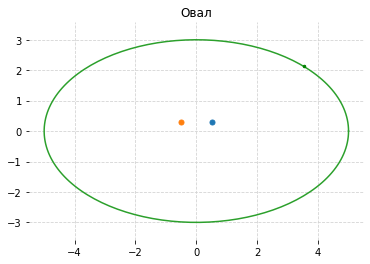

In [70]:
fig = plt.figure(1)

ax = plt.gca()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])

plt.title("Овал")
plt.plot(o1_x ,o1_y, marker=".", markersize=10)
plt.plot(o2_x ,o2_y, marker=".", markersize=10)
plt.plot(x ,y)
plt.plot(x[25],y[25], marker=".", markersize=5, color='green')
plt.grid(color='lightgray',linestyle='--')
# plt.axis("off")
plt.box(False)
plt.axis('equal')

In [51]:
def line_intersec(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    point_x = ((x2 - x1) * (y3 * x4 - y4 * x3) - (x4 - x3) * (y1 * x2 - y2 * x1)) / ((y3 - y4) * (x2 - x1) - (y1 - y2) * (x4 - x3))
    point_y = y1 + ((point_x - x1) * (y2 - y1)) / (x2 - x1)
    return np.array([point_x, point_y])

In [85]:
origin = (x[0], y[0])
point = (x[0]-1, y[0]-1)
p = rotate(origin, point, 10)

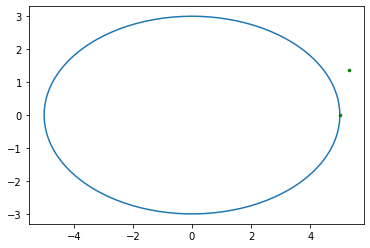

In [89]:
plt.plot(x ,y)
plt.plot(origin[0], origin[1], marker=".", markersize=5, color='green')
plt.plot(p[0],p[1], marker=".", markersize=5, color='green')

In [94]:
L1 = line(origin, p)
        
if origin[0] < p[0]:
    xt = np.linspace(-50, 50, 500)
else:
    xt = np.linspace(50, -50, 500)

yt = (L1[2] - (L1[0] * x_t)) / (L1[1] + 0.0001)

(-55.0, 55.0, -281.16361449756914, 234.30301208130766)

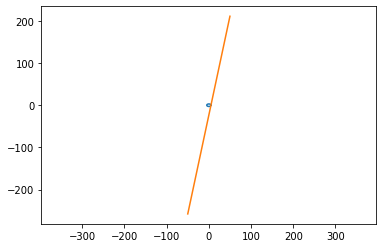

In [96]:
plt.plot(x ,y)
plt.plot(xt ,yt)